# Stock Tracking Dashboards with Dash

#### What is a dashboard?
Dashboarding is the processing of showcasing data in a user-friendly way using data visualization. Dashboards contain a multitude of data views, much like the dashboard on a car. The ultimate goal of a dashboard is to present data to the world, so that users can track, analyze, and gain insights from your data quickly.

#### What is Dash?
Dash is a dashboard creation in Python created by the creators of plotly, a popular plotting package. Dash offers components and callbacks that display information and aid with user interactions that are implemented in an HTML-like system, i.e., every object is a component and components can have children.  It also offers customizability, like adjusting the theming and branding, using CSS.

Dash also works with R and Julia

#### What will be covered in this Workshop?

* Installation
* Stock tracking using yahooquery
* Dash Layout
* Dash Callbacks
* User Interactions
* Simple Web Hosting

## yahooquery
Yahooquery is an unofficial stock tracking wrapper using Yahoo Finance, which contains historical and near realtime data financial data. The wrapper allows us to query stock data from the its API to view and analyze. It requires no API keys to access so it is free to use.

In [22]:
from yahooquery import Ticker # Interacts with the yahooquery api
import pandas as pd # Used to manipulate dataframes

### Tickers
Tickers are symbols that represent a company. For example, Apple's symbol is **\$aapl**. We will be using these to specify which ticker to query from the API. 

For more information, view the docs: https://yahooquery.dpguthrie.com/

In [33]:
aapl_ticker = Ticker("aapl")
print(aapl_ticker.summary_profile)

# Can also specify multiple tickers
symbols_str = "meta aapl goog" # Tickers for Meta, Apple, and Google
symbols_list = ["meta", "aapl", "goog"]
tickers_from_str = Ticker(symbols_str)
tickers_from_list = Ticker(symbols_list)

tickers_from_str.summary_profile

{'aapl': {'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '408 996 1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'sector': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. Further, it provides AppleCare support and cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as 

{'meta': {'address1': '1601 Willow Road',
  'city': 'Menlo Park',
  'state': 'CA',
  'zip': '94025',
  'country': 'United States',
  'phone': '650 543 4800',
  'website': 'https://investor.fb.com',
  'industry': 'Internet Content & Information',
  'sector': 'Communication Services',
  'longBusinessSummary': 'Meta Platforms, Inc. engages in the development of products that enable people to connect and share with friends and family through mobile devices, personal computers, virtual reality headsets, and wearables worldwide. It operates in two segments, Family of Apps and Reality Labs. The Family of Apps segment offers Facebook, which enables people to share, discuss, discover, and connect with interests; Instagram, a community for sharing photos, videos, and private messages, as well as feed, stories, reels, video, live, and shops; Messenger, a messaging application for people to connect with friends, family, communities, and businesses across platforms and devices through text, audio, 

### Modules
After creating our Ticker symbols, we can use them to view useful information about the company. The information from modules are overview data, such as the asset profile, earnings, and (non-historical) pricing. 

In [37]:
aapl_ticker.price # all metrics related to price

{'aapl': {'maxAge': 1,
  'preMarketChangePercent': -0.000595963,
  'preMarketChange': -0.0899963,
  'preMarketTime': '2023-02-13 09:29:59',
  'preMarketPrice': 150.92,
  'preMarketSource': 'FREE_REALTIME',
  'regularMarketChangePercent': 0.016952606,
  'regularMarketChange': 2.5600128,
  'regularMarketTime': '2023-02-13 13:16:36',
  'priceHint': 2,
  'regularMarketPrice': 153.57,
  'regularMarketDayHigh': 154.26,
  'regularMarketDayLow': 150.92,
  'regularMarketVolume': 30437480,
  'regularMarketPreviousClose': 151.01,
  'regularMarketSource': 'FREE_REALTIME',
  'regularMarketOpen': 150.952,
  'exchange': 'NMS',
  'exchangeName': 'NasdaqGS',
  'exchangeDataDelayedBy': 0,
  'marketState': 'REGULAR',
  'quoteType': 'EQUITY',
  'symbol': 'AAPL',
  'underlyingSymbol': None,
  'shortName': 'Apple Inc.',
  'longName': 'Apple Inc.',
  'currency': 'USD',
  'quoteSourceName': 'Nasdaq Real Time Price',
  'currencySymbol': '$',
  'fromCurrency': None,
  'toCurrency': None,
  'lastMarket': None,
 

In [38]:
aapl_ticker.asset_profile # details about the company

{'aapl': {'address1': 'One Apple Park Way',
  'city': 'Cupertino',
  'state': 'CA',
  'zip': '95014',
  'country': 'United States',
  'phone': '408 996 1010',
  'website': 'https://www.apple.com',
  'industry': 'Consumer Electronics',
  'sector': 'Technology',
  'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. Further, it provides AppleCare support and cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various 

In [108]:
aapl_ticker.summary_detail

{'aapl': {'maxAge': 1,
  'priceHint': 2,
  'previousClose': 153.2,
  'open': 153.11,
  'dayLow': 152.88,
  'dayHigh': 155.5,
  'regularMarketPreviousClose': 153.2,
  'regularMarketOpen': 153.11,
  'regularMarketDayLow': 152.88,
  'regularMarketDayHigh': 155.5,
  'dividendRate': 0.92,
  'dividendYield': 0.006,
  'exDividendDate': '2023-02-09 19:00:00',
  'payoutRatio': 0.1545,
  'fiveYearAvgDividendYield': 0.96,
  'beta': 1.277894,
  'trailingPE': 26.295418,
  'forwardPE': 23.537994,
  'volume': 33179579,
  'regularMarketVolume': 33179579,
  'averageVolume': 75599268,
  'averageVolume10days': 80482600,
  'averageDailyVolume10Day': 80482600,
  'bid': 154.88,
  'ask': 154.86,
  'bidSize': 900,
  'askSize': 800,
  'marketCap': 2450495897600,
  'fiftyTwoWeekLow': 124.17,
  'fiftyTwoWeekHigh': 179.61,
  'priceToSalesTrailing12Months': 6.3232565,
  'fiftyDayAverage': 139.6132,
  'twoHundredDayAverage': 147.46124,
  'trailingAnnualDividendRate': 0.91,
  'trailingAnnualDividendYield': 0.0059399

### History
The API also contains the historical stock price for the ticker. You can specify the period (length of time), interval (time between points), start, and end time.

In [41]:
hist1 = aapl_ticker.history() #Default is period=ytd, interval=1d
hist1.head()

open        high         low  \
symbol date                                                            
aapl   2023-01-03                 130.279999  130.899994  124.169998   
       2023-01-04                 126.889999  128.660004  125.080002   
       2023-01-05                 127.129997  127.769997  124.760002   
       2023-01-06                 126.010002  130.289993  124.889999   
       2023-01-09                 130.470001  133.410004  129.889999   
       2023-01-10                 130.259995  131.259995  128.119995   
       2023-01-11                 131.250000  133.509995  130.460007   
       2023-01-12                 133.880005  134.259995  131.440002   
       2023-01-13                 132.029999  134.919998  131.660004   
       2023-01-17                 134.830002  137.289993  134.130005   
       2023-01-18                 136.820007  138.610001  135.029999   
       2023-01-19                 134.080002  136.250000  133.770004   
       2023-01-20                 135.279999  138.020004  134.220001   
       2023-01-23                 138.119995  143.320007  137.899994   
       2023-01-24                 140.309998  143.160004  140.300003   
       2023-01-25                 140.889999  142.429993  138.809998   
       2023-01-26                 143.169998  144.250000  141.899994   
       2023-01-27                 143.160004  147.229996  143.080002   
       2023-01-30                 144.960007  145.550003  142.850006   
       2023-01-31                 142.699997  144.339996  142.279999   
       2023-02-01                 143.970001  146.610001  141.320007   
       2023-02-02                 148.899994  151.179993  148.169998   
       2023-02-03                 148.029999  157.380005  147.830002   
       2023-02-06                 152.570007  153.100006  150.779999   
       2023-02-07                 150.639999  155.229996  150.639999   
       2023-02-08                 153.880005  154.580002  151.169998   
       2023-02-09                 153.779999  154.330002  150.419998   
       2023-02-10                 149.460007  151.339996  149.220001   
       2023-02-13 13:32:09-05:00  150.951996  154.259995  150.919998   

                                       close     volume    adjclose  dividends  
symbol date                                                                     
aapl   2023-01-03                 125.070000  112117500  124.879326       0.00  
       2023-01-04                 126.360001   89113600  126.167366       0.00  
       2023-01-05                 125.019997   80962700  124.829399       0.00  
       2023-01-06                 129.619995   87686600  129.422394       0.00  
       2023-01-09                 130.149994   70790800  129.951584       0.00  
       2023-01-10                 130.729996   63896200  130.530701       0.00  
       2023-01-11                 133.490005   69458900  133.286499       0.00  
       2023-01-12                 133.410004   71379600  133.206619       0.00  
       2023-01-13                 134.759995   57758000  134.554550       0.00  
       2023-01-17                 135.940002   63646600  135.732758       0.00  
       2023-01-18                 135.210007   69672800  135.003876       0.00  
       2023-01-19                 135.270004   58280400  135.063782       0.00  
       2023-01-20                 137.869995   79972200  137.659805       0.00  
       2023-01-23                 141.110001   81760300  140.894882       0.00  
       2023-01-24                 142.529999   66435100  142.312714       0.00  
       2023-01-25                 141.860001   65799300  141.643738       0.00  
       2023-01-26                 143.960007   54105100  143.740540       0.00  
       2023-01-27                 145.929993   70492800  145.707520       0.00  
       2023-01-30                 143.000000   64015300  142.781998       0.00  
       2023-01-31                 144.289993   65874500  144.070023       0.00  
       2023-02-01        

In [44]:
aapl_ticker.history("1y", "1mo") # 1 year period, 1 month intervals

open        high         low  \
symbol date                                                            
aapl   2022-03-01 00:00:00-05:00  164.699997  179.610001  150.100006   
       2022-04-01 00:00:00-04:00  174.029999  178.490005  155.380005   
       2022-05-01 00:00:00-04:00  156.710007  166.479996  132.610001   
       2022-06-01 00:00:00-04:00  149.899994  151.740005  129.039993   
       2022-07-01 00:00:00-04:00  136.039993  163.630005  135.660004   
       2022-08-01 00:00:00-04:00  161.009995  176.149994  157.139999   
       2022-09-01 00:00:00-04:00  156.639999  164.259995  138.000000   
       2022-10-01 00:00:00-04:00  138.210007  157.500000  134.369995   
       2022-11-01 00:00:00-04:00  155.080002  155.449997  134.380005   
       2022-12-01 00:00:00-05:00  148.210007  150.919998  125.870003   
       2023-01-01 00:00:00-05:00  130.279999  147.229996  124.169998   
       2023-02-01 00:00:00-05:00  143.970001  157.380005  141.320007   
       2023-02-13 13:33:04-05:00  150.951996  154.259995  150.919998   

                                       close      volume    adjclose  \
symbol date                                                            
aapl   2022-03-01 00:00:00-05:00  174.610001  2180800100  173.558640   
       2022-04-01 00:00:00-04:00  157.649994  1687795600  156.700745   
       2022-05-01 00:00:00-04:00  148.839996  2401040300  147.943787   
       2022-06-01 00:00:00-04:00  136.720001  1749099800  136.096436   
       2022-07-01 00:00:00-04:00  162.509995  1447125400  161.768814   
       2022-08-01 00:00:00-04:00  157.220001  1510239600  156.502960   
       2022-09-01 00:00:00-04:00  138.199997  2084722800  137.760773   
       2022-10-01 00:00:00-04:00  153.339996  1868139700  152.852676   
       2022-11-01 00:00:00-04:00  148.029999  1724847700  147.559540   
       2022-12-01 00:00:00-05:00  129.929993  1675657600  129.731918   
       2023-01-01 00:00:00-05:00  144.289993  1443218300  144.070023   
       2023-02-01 00:00:00-05:00  151.009995   680999700  150.779785   
       2023-02-13 13:33:04-05:00  154.119995    33461503  154.119995   

                                  dividends  
symbol date                                  
aapl   2022-03-01 00:00:00-05:00       0.00  
       2022-04-01 00:00:00-04:00       0.00  
       2022-05-01 00:00:00-04:00       0.23  
       2022-06-01 00:00:00-04:00       0.00  
       2022-07-01 00:00:00-04:00       0.00  
       2022-08-01 00:00:00-04:00       0.23  
       2022-09-01 00:00:00-04:00       0.00  
       2022-10-01 00:00:00-04:00       0.00  
       2022-11-01 00:00:00-04:00       0.23  
       2022-12-01 00:00:00-05:00       0.00  
       2023-01-01 00:00:00-05:00       0.00  
       2023-02-01 00:00:00-05:00       0.23  
       2023-02-13 13:33:04-05:00       0.00

## Stock visualization
Stocks have many metrics and these may be hard to view in a dataframe. It may be more useful to visualize these metrics instead.

In [172]:
# Imports
from yahooquery import Ticker
import pandas as pd
import plotly.express as px # library for creating the most common figures
import plotly.graph_objects as go # Another ploting library from plotly
from plotly.subplots import make_subplots

### Quick indicators
Some metrics need to be analyzed with a quick glance. Let's use plotly to create an indicator.

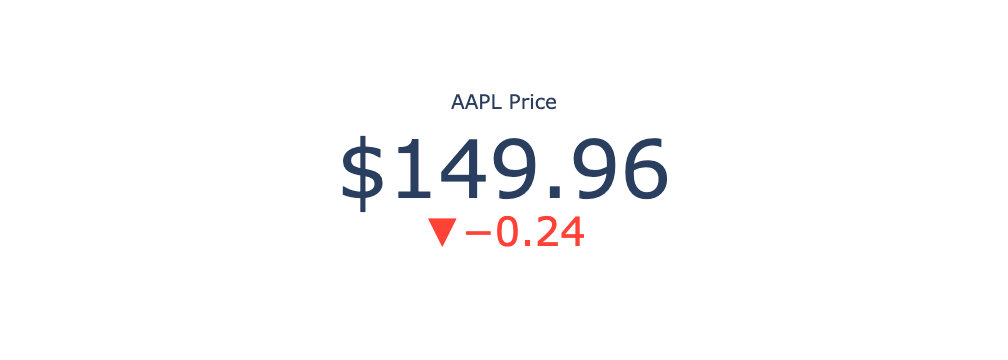

In [215]:
symbol = "aapl"
ticker = Ticker(symbol)
open_price = ticker.price[symbol]["regularMarketOpen"]
current_price = ticker.price[symbol]["regularMarketPrice"]

delta_fig = go.Figure()

delta_fig.add_trace(go.Indicator(
                title = {"text": f"{symbol.upper()} Current Price"},
                delta = {'reference': open_price, "valueformat": ".2f"},
                mode = "number+delta",
                value = current_price,
                number = {"prefix": "$", "valueformat": ".2f"}))


### Visualizing price history
Plotly express is the recommended way of building basic plots, e.g. bar, maps, heatmaps, but some plots are not supported because of how complex they are. All plotly figures are created using the graph objects library using objects called traces. These traces can be used to create more sophisticated figures. 

One of these traces is the Candlestick, which is popular in Finance visualization. A volume and price chart usually has a bar trace for the volume and candlestick trace for price.

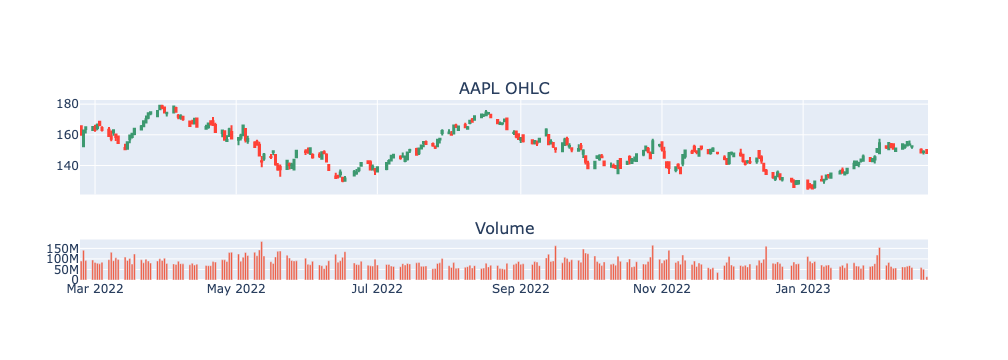

In [338]:
# initialize our parameters for the history
symbol = "aapl"
period = "1y"
interval = "1d"

ticker = Ticker(symbol)
history = ticker.history(period, interval).reset_index(level=[0,1]) # reset multi-index to be regular index

# Intialize subplots
fig = make_subplots(rows=2, cols=1, 
                    shared_xaxes=True, 
                    subplot_titles=(f'{symbol.upper()} OHLC', 'Volume'), 
                    row_heights=[0.7, 0.3]
                   )

# Adds a Candlestick chart to the top subplot
fig.add_trace(go.Candlestick(x=history['date'], 
                open=history['open'],
                high=history['high'],
                low=history['low'],
                close=history['close'],
                showlegend=False),
                row=1, col=1
             )

# Adds volume bar chart to the bottom subplot
fig.add_trace(go.Bar(
    x=history['date'], 
    y=history['volume'], 
    showlegend=False), 
    row=2, col=1
 )

fig.update(layout_xaxis_rangeslider_visible=False)
fig

In [340]:
%%writefile process_data.py
from yahooquery import Ticker
import pandas as pd
import plotly.express as px # library for creating the most common figures
import plotly.graph_objects as go # Another ploting library from plotly
from plotly.subplots import make_subplots



# Let's make a reusable function to create the price indciator for different symbols
def price_indicator(symbol="aapl"):
    ticker = Ticker(symbol)
    open_price = ticker.price[symbol]["regularMarketOpen"]
    current_price = ticker.price[symbol]["regularMarketPrice"]

    delta_fig = go.Figure()

    delta_fig.add_trace(go.Indicator(
                    title = {"text": f"{symbol.upper()} Current Price"},
                    delta = {'reference': open_price, "valueformat": ".2f"},
                    mode = "number+delta",
                    value = current_price,
                    number = {"prefix": "$", "valueformat": ".2f"}))
    return delta_fig

# Another function to create charts for different tickers
def candlestick_chart(symbol="aapl", period="1y", interval="1d"):
    # Because we are creating a new python file, we need
    # to reinstantiate our ticker variable
    ticker = Ticker(symbol)
    history = ticker.history(period, interval).reset_index(level=[0,1]) # 1 year period, 1 day intervals

    fig = make_subplots(rows=2, cols=1, 
                    shared_xaxes=True, 
                    subplot_titles=(f'{symbol.upper()} OHLC', 'Volume'), 
                    row_heights=[0.7, 0.3]
                   )

    # Creates a Candlestick graph using 
    fig.add_trace(go.Candlestick(x=history['date'], 
                    open=history['open'],
                    high=history['high'],
                    low=history['low'],
                    close=history['close'],
                    showlegend=False),
                    row=1, col=1,
                 )

    fig.add_trace(go.Bar(x=history['date'], y=history['volume'], showlegend=False), row=2, col=1)
    fig.update(layout_xaxis_rangeslider_visible=False)
    
    return fig

Overwriting process_data.py


## Dash Development
Because we are using Jupyterlab as our development environment, we need to do a few workarounds to setup the environment. 
1) We need to save our code in this notebook to a file. To do this, we add `%%writefile app.py` to the top of the cell with the code. This will save the code in the cell to a python file called `app.py`
2) We need to run `python app.py` in the terminal. This will run the python file on the computer at the IP address: `127.0.0.1:8050`. Open a new tab and navigate to this address to see the app.
### Layout
Dash's layout system describes what the dashboard will look like. The layout is based on HTML. There are Dash elements analogous to HTML elements (e.g. `dash.html.Div` == `<div>`) and each element can be nested like in HTML. 

In [361]:
%%writefile app.py
from dash import Dash # The actual Dash app that will be run
from dash import html # Contains html components
from dash import dcc  # Contains commonly user-interaction components
from dash import Input, Output # Used for callbacks

import process_data # Our own import, used to load data from yahooquery
import news_table
import app_callbacks

# Build App
app = Dash(__name__)

price_chart = process_data.candlestick_chart("aapl", "1y", "1d")
price_metric = process_data.price_indicator("aapl")
news_table = news_table.generate_news_table("aapl")

app.layout = html.Div (
    # Children HTML elements can be nested
    children = [ # Children can be specified explicitly using the parameter tag
        html.Header( # Or implicitly
            [html.H1(children="Stock Dashboard"), 
             html.Span([
                 dcc.Input(id='my-input', type='text', placeholder="input ticker symbol", className="form-control"),
                 html.Button(id='submit-button-state', n_clicks=0, children='Submit', className="btn btn-outline-primary")],
                 className = "d-flex"
             )],
            className = "navbar"
        ),
        "This dashboard displays metrics about your favorite stock tickers",
        html.Div([
            dcc.Graph(
                id='price-metric', # IDs can be added to elements to manipulate using callbacks
                figure=price_metric
            ),
            html.Span(news_table,
                    id = "news-table")
            ], 
            id = "first-data"),
        dcc.Graph(
            id='price-history',
            figure=price_chart
        ),
    ]
)


if __name__ == '__main__':
    app.run_server(debug=True)

Overwriting app.py


In [346]:
%%writefile news_table.py
from dash import html
from dash import dcc
import yahooquery as yq
from datetime import datetime 


# Generates html table with the latest articles for company associated with ticker
def generate_news_table(symbol="aapl", limit=5):
    news_raw = yq.search(symbol)["news"][:limit] # get the latest n articles for the ticker from yq
    return html.Table(
        [html.Tr([html.Th("News", colSpan=3)], # creates header
                 id = "news-table-header")] + 
        [html.Tr(
           [html.Td(html.Img(src=article["thumbnail"]["resolutions"][-1]["url"], height="70px", width="70px") 
                    if "thumbnail" in article else ""), # loads thumbnail
            html.Td(html.A(article["publisher"] + ": " + article["title"], href=article["link"], 
                           target="_blank", rel="noopener noreferrer")), # creates hyperlink
            html.Td(datetime.fromtimestamp(article["providerPublishTime"]).strftime("%d/%m/%Y, %H:%M:%S"))] # creates time from epoch
        ) for article in news_raw],
        className = "table"
    )

Overwriting news_table.py



### Callbacks
Dash has callbacks that dynamically change a component of the dashboard based on user interaction. For example, a user can change the value on a date slider to change the date that is displayed on a calender.

In [357]:
%%writefile app_callbacks.py
import process_data # Our own import, used to load data from yahooquery
import news_table
import dash
from dash import Input, Output, State


# @dash.callback(
#     Output(component_id='price-history', component_property='figure'), #specifies the two outputs components and which
#     Output(component_id='price-metric', component_property='figure'), # part of the component
#     Output(component_id="news-table", component_property='children'),
#     Input(component_id='my-input', component_property='value'), # specifies where to look for a change
#     prevent_initial_call = True
# )
# def update_output_div(symbol):
#     # returns the figure to the target component property BASED ON THE ORDER OF OUTPUTS
#     return process_data.candlestick_chart(symbol, "1y", "1d"), process_data.price_indicator(symbol), news_table.generate_news_table(symbol)

@dash.callback(
    Output(component_id='price-history', component_property='figure'),
    Output(component_id='price-metric', component_property='figure'),
    Output(component_id="news-table", component_property='children'),
    Input(component_id='submit-button-state', component_property='n_clicks'),
    State(component_id='my-input', component_property='value'),
#     prevent_initial_call = True
)
def update_output_div(n_clicks, symbol):
    return process_data.candlestick_chart(symbol, "1y", "1d"), process_data.price_indicator(symbol), news_table.generate_news_table(symbol)

Overwriting app_callbacks.py


### Styling
Our dashboard looks like it was made in the early 2000s. To help this look more modern, we can add styling to the dashboard. To do this, we need to apply or CSS rules to app layout components. The CSS and non-code files must be located in the assets file.
We will also use Bootstrap CSS to simplify our styling, but those will need to be activated by specifying the class name. 

Let's take a look at CSS file.

In [339]:
# %load assets/app.css
#first-data {
    display:flex;
    flex-direction: row; 
    justify-content: center; 
    align-items: center
}

td {
    padding-left: 10px;
    padding-right: 10px;
}

#news-table-header {
    text-align: center;
}